<a href="https://colab.research.google.com/github/MareevaMI/PDA_SOL/blob/main/hw_3_pandas(%D0%9C%D0%B0%D1%80%D0%B5%D0%B5%D0%B2%D0%B0_%D0%9C_%D0%98_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Самостоятельная работа 3. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [42]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) Выведите последние 10 элеметнов датасета

In [44]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [45]:
df.shape
# 32561 строк и 15 столбцов

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [46]:
df.dtypes
# Типы данных - int64, object

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [47]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:
1. Некоторые люди не сообщили информацию о себе
2. Ошибки при заполнении данных (например, невнимательность)


6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [48]:
df.workclass.value_counts()
# Ответ представлен в таблице

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [49]:
df.groupby(by = 'sex', as_index = False).agg({'age':'mean'})
# Средний возраст женщин - 36-37 лет, мужчин - 39-40 лет

,sex,age
0,Female,36.858230
1,Male,39.433547


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: >

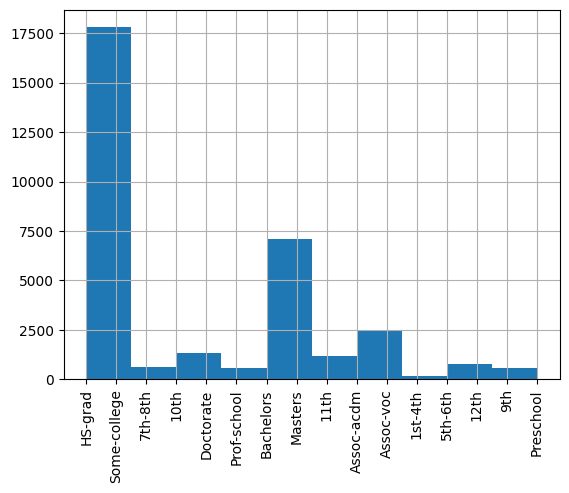

In [50]:
df.education.hist(xrot = 90)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [51]:
df.groupby(by = 'income', as_index = False).agg({'age' : ['mean', 'std']})
# Средние значения, соответственно, 36,8 и 44,2
# Отклонения, соответственно, 14 и 10,5

income        age           
               mean        std
0  <=50K  36.783738  14.020088
1   >50K  44.249841  10.519028

10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [52]:
print(df.loc[df['income']=='>50K', 'education'].min())
# Нет, не правда. Люди, получающие больше 50к учатся как минимум в 10 классе

10th


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [76]:
import re
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult.csv', usecols=['sex', 'income', 'marital.status'])
df[(df['sex'] == 'Male') & (df['income'] == '>50K')]['marital.status'].value_counts().loc[['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']]
# Число женатых мужчин, зарабатывающих много - 5965


Married-civ-spouse       5938
Married-spouse-absent      23
Married-AF-spouse           4
Name: marital.status, dtype: int64

In [80]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult.csv', usecols=['sex', 'income', 'marital.status'])
df[(df['sex'] == 'Male') & (df['income'] == '>50K')]['marital.status'].value_counts().loc['Never-married']

325

In [ ]:
# Больше зарабатывающих много среди женатых мужчин

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [54]:
df.groupby(by = ['native.country', 'income']).agg({'hours.per.week' : 'mean'})
# Ответ представлен в таблице (исключение - первая строка)

hours.per.week
native.country income                
?              <=50K        40.164760
               >50K         45.547945
Cambodia       <=50K        41.416667
               >50K         40.000000
Canada         <=50K        37.914634
...                               ...
United-States  >50K         45.505369
Vietnam        <=50K        37.193548
               >50K         39.200000
Yugoslavia     <=50K        41.600000
               >50K         49.500000

[82 rows x 1 columns]

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [55]:
import numpy as np
df['capital_diff_log'] = np.log(np.abs(df['capital.gain'] - df['capital.loss']))
df['capital_diff_log_round'] = np.round(df['capital_diff_log'], decimals = 0)

pd.pivot_table(df, index = 'education', columns = 'capital_diff_log_round', aggfunc = len, fill_value = 0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


age                                                  \
capital_diff_log_round -inf   5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0   
education                                                                      
10th                     865     2     1    17    38     5     3     0     2   
11th                    1089     0     6    24    35    17     4     0     0   
12th                     403     0     3     9    10     5     3     0     0   
1st-4th                  159     0     0     2     6     1     0     0     0   
5th-6th                  308     0     0     4    16     5     0     0     0   
7th-8th                  582     0     0    17    39     8     0     0     0   
9th                      474     2     2    13    20     2     0     0     1   
Assoc-acdm               930     0     0    25    63    33    15     0     1   
Assoc-voc               1194     0     3    19    94    52    19     0     1   
Bachelors               4384     2     4   101   376   274   173     0    41   
Doctorate                284     0     1     4    59    20    33     0    12   
HS-grad                 9415     2    20   186   570   217    68     0    23   
Masters                 1300     1     2    25   170   112    94     1    18   
Preschool                 47     0     0     2     1     0     0     1     0   
Prof-school              363     0     0    10    66    19    72     0    46   
Some-college            6533     2    15   137   349   179    62     0    14   

                       capital.gain  ...   sex workclass                    \
capital_diff_log_round        -inf   ...  12.0     -inf   5.0   6.0   7.0    
education                            ...                                     
10th                            865  ...     2       865     2     1    17   
11th                           1089  ...     0      1089     0     6    24   
12th                            403  ...     0       403     0     3     9   
1st-4th                         159  ...     0       159     0     0     2   
5th-6th                         308  ...     0       308     0     0     4   
7th-8th                         582  ...     0       582     0     0    17   
9th                             474  ...     1       474     2     2    13   
Assoc-acdm                      930  ...     1       930     0     0    25   
Assoc-voc                      1194  ...     1      1194     0     3    19   
Bachelors                      4384  ...    41      4384     2     4   101   
Doctorate                       284  ...    12       284     0     1     4   
HS-grad                        9415  ...    23      9415     2    20   186   
Masters                        1300  ...    18      1300     1     2    25   
Preschool                        47  ...     0        47     0     0     2   
Prof-school                     363  ...    46       363     0     0    10   
Some-college                   6533  ...    14      6533     2    15   137   

                                                      
capital_diff_log_round  8.0   9.0   10.0  11.0  12.0  
education                                             
10th                      38     5     3     0     2  
11th                      35    17     4     0     0  
12th                      10     5     3     0     0  
1st-4th                    6     1     0     0     0  
5th-6th                   16     5     0     0     0  
7th-8th                   39     8     0     0     0  
9th                       20     2     0     0     1  
Assoc-acdm                63    33    15     0     1  
Assoc-voc                 94    52    19     0     1  
Bachelors                376   274   173     0    41  
Doctorate                 59    20    33     0    12  
HS-grad                  570   217    68     0    23  
Masters                  170   112    94     1    18  
Preschool                  1     0     0     1     0  
Prof-school               66    19    72     0    46  
Some-college             349   

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [57]:
salary_df = df.query("sex == 'Female'").groupby(by = 'native.country', as_index = False)['income'] \
    .value_counts(normalize = True, ascending = True)
salary_df.query("income == '>50K' ").sort_values(by = 'proportion', ascending = False)

,native.country,income,proportion
74,Yugoslavia,>50K,0.333333
65,Taiwan,>50K,0.266667
17,France,>50K,0.250000
43,Japan,>50K,0.250000
35,Iran,>50K,0.250000
39,Italy,>50K,0.238095
5,China,>50K,0.238095
3,Canada,>50K,0.230769
21,Greece,>50K,0.200000
61,Scotland,>50K,0.200000


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary